# Red Wine Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

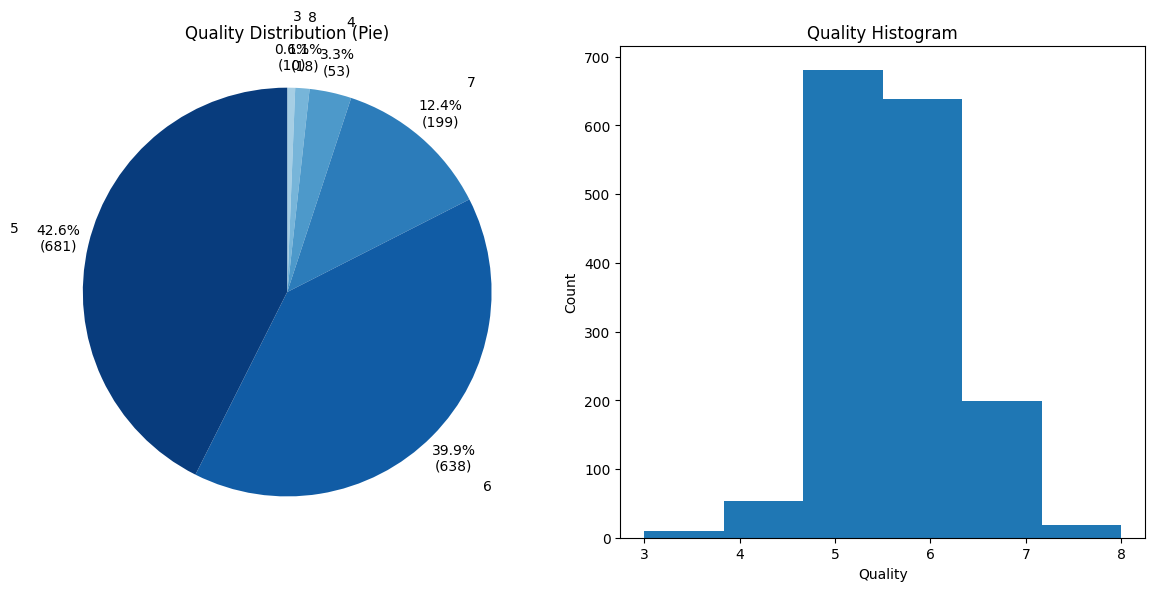

In [2]:
# ÌäπÏÑ± ÏÇ¥Ìé¥Î≥¥Í∏∞(ÌíàÏßà Î∂ÑÌè¨, ÌûàÏä§ÌÜ†Í∑∏Îû®)
# df.info()

# Î∂ÑÌè¨ ÏßëÍ≥Ñ
quality_dist = df.groupby('quality').size().sort_values()

# ÏÑúÎ∏åÌîåÎ°Ø
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- (1) ÌååÏù¥Ï∞®Ìä∏ ---
# colormap ‚Üí colors Î∞∞Ïó¥Î°ú Î≥ÄÌôò
cmap = plt.get_cmap('Blues')          # ÎÑ§Í∞Ä ÏõêÌïú blue Í≥ÑÏó¥
colors = cmap(np.linspace(0.35, 0.95, len(quality_dist)))

axes[0].pie(
    quality_dist,
    labels=quality_dist.index,
    colors=colors,                     # Ïó¨Í∏∞!
    autopct=lambda p: f'{p:.1f}%\n({p*quality_dist.sum()/100:.0f})',
    pctdistance=1.15,                  # Í∞í/ÌçºÏÑºÌä∏Î•º Î∞îÍπ•ÏúºÎ°ú
    labeldistance=1.35,                # ÎùºÎ≤® Îçî Î∞îÍπ•
    startangle=90,
    counterclock=False,
)
axes[0].set_title('Quality Distribution (Pie)')
axes[0].axis('equal')                  # ÏõêÌòï Ïú†ÏßÄ

# --- (2) ÌûàÏä§ÌÜ†Í∑∏Îû® ---
axes[1].hist(
    df['quality'],
    bins=len(quality_dist),
    color='tab:blue'
)
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Count')
axes[1].set_title('Quality Histogram')

plt.tight_layout()
plt.show()

index   quality
0                quality  1.000000
1                alcohol  0.476166
2              sulphates  0.251397
3            citric acid  0.226373
4          fixed acidity  0.124052
5         residual sugar  0.013732
6    free sulfur dioxide -0.050656
7                     pH -0.057731
8              chlorides -0.128907
9                density -0.174919
10  total sulfur dioxide -0.185100
11      volatile acidity -0.390558

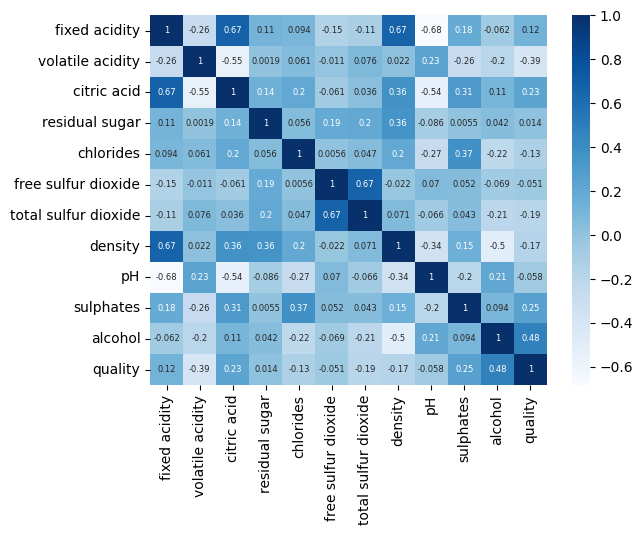

In [3]:
# ÌíàÏßàÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ / ÌíàÏßàÏóê ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Ï£ºÎäî ÌäπÏÑ± ÏúÑÏ£ºÎ°ú.
from cProfile import label


sns.heatmap(
    df.corr(method='pearson'),
    cmap='Blues',
    annot=True,
    annot_kws={'size': 6}
    )
df.corr(method='pearson')['quality'].sort_values(ascending=False).reset_index()


In [4]:
# Ï∂îÍ∞ÄÎ°ú, Îì±Í∏âÏùÑ Î∂ÑÎ•òÌï¥Î≥¥Î©¥ Ï¢ãÏùÑ ÎìØ. Í∑ºÎç∞ Ïù¥ÎØ∏ qualityÍ∞Ä ÏûàÎäîÎç∞Ïöî...?
# quality_labels(Í∑∏Î£π): 0~5 -> 0 / 6 ~7 -> 1 / 8 ~ -> 2

df['quality_label'] = pd.cut(
    df['quality'],
    bins=[0, 5, 7, 10],
    labels=[0, 1, 2]
)
df.groupby('quality_label').size()

quality_label
0    744
1    837
2     18
dtype: int64

In [5]:
# ÌõàÎ†® ÌÖåÏä§Ìä∏ ÏÖã ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# KNN ÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏°

# Ï†ïÍ∑úÌôî
# Ïä§ÏºÄÏùºÎßÅ

ss = StandardScaler()

ss.fit(X_train) # X_trainÏùÑ Í∏∞Ï§ÄÏúºÎ°ú 
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
# ss.fit_transform(X_train) Ïù¥Î†áÍ≤å Ïç®ÎèÑ Îê®.

for k in range(1, 30):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    print(k, ':::',kn.score(X_train, y_train), kn.score(X_test, y_test))
    

# y_train.value_counts(normalize=True).head(1)

1 ::: 1.0 0.054306643091689866
2 ::: 0.7649031949854582 0.23819146249052792
3 ::: 0.6261111052780781 0.25233644859813087
4 ::: 0.5711135595266843 0.28466784541550894
5 ::: 0.517695914660395 0.3100479919171508
6 ::: 0.48319266974417485 0.3195812635064973
7 ::: 0.45880783568217653 0.3158445494894093
8 ::: 0.446149536580116 0.3338595604950745
9 ::: 0.43012910575846086 0.3383040361233507
10 ::: 0.42090023413794186 0.34379388734528915
11 ::: 0.4094059883188743 0.3435190036719348
12 ::: 0.40664545775892535 0.3459627852151216
13 ::: 0.402327506464778 0.3448587668573292
14 ::: 0.3991713623176977 0.3504028537406374
15 ::: 0.39356983715338656 0.3339013780135276
16 ::: 0.39391563717281053 0.32396122758272294
17 ::: 0.3900723143899958 0.3317944921605628
18 ::: 0.3893085885706514 0.33158080198578643
19 ::: 0.38788888244831565 0.33263877178755374
20 ::: 0.3855979468307381 0.3245971204849709
21 ::: 0.3833261087054015 0.32740064115230993
22 ::: 0.38243879531113245 0.3246144885906993
23 ::: 0.381149661

In [27]:
# ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ÌíàÏßà ÏòàÏ∏° (ÌõàÎ†®ÏÖã-ÌÖåÏä§Ìä∏ÏÖã Ï†êÏàò ÎÜíÏó¨Î≥¥Ïûê)
# is the ÏßÅÏÑ†
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lr_basic = LinearRegression()
lr_basic.fit(X_train, y_train)
lr_basic.score(X_test, y_test)
lr_basic.predict(X_test)
print('')
# lr = LogisticRegression(max_iter=1000)

# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)
# # lr.predict(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Îã§Ìï≠ÌöåÍ∑ÄÎäî Ïä§ÏºÄÏùºÎßÅ ÌïÑÏàò
# ÎÇòÎäî Í∑∏ÎÉ• Îã§ Ìï¥ÎÜ®Ïùå.

poly_result = []
for degree in [2, 3, 4]:
    print('\n')
    # Îã§Ìï≠Ïãù ÌäπÏÑ± ÏÉùÏÑ±
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    print(f'ÏõêÎûò ÌäπÏÑ± Ïàò : {X_train.shape[1]}')
    print(f'Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò : {X_train_poly.shape[1]}')

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# ÏÑ±Îä• ÌèâÍ∞Ä
lr_poly.score(X_test_poly, y_test) #...?(ÏñòÎäî 4Ï∞®Ïãù)

# 2Ï∞®Ïãù ÎßåÎì§Í∏∞
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# ÏÑ±Îä• ÌèâÍ∞Ä
lr_poly.score(X_test_poly, y_test) # 2Ï∞®Ïãù: 0.3744541652896375




ÏõêÎûò ÌäπÏÑ± Ïàò : 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò : 77


ÏõêÎûò ÌäπÏÑ± Ïàò : 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò : 363


ÏõêÎûò ÌäπÏÑ± Ïàò : 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò : 1364


0.3744541652896375

In [33]:
# Ridge, LassoÎ°ú Í∑úÏ†úÌï¥ÏÑú ÏòàÏ∏°

from sklearn.linear_model import Ridge, Lasso

# Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥ Ridge/Lasso Ï†ÅÏö© (ÏïûÏÑú ÎßåÎì† ÏµúÏ†Å degree ÏÇ¨Ïö©)
print(f"Îã§Ìï≠Ïãù ÌäπÏÑ± (degree={best_degree}) Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©:")
print(f"ÌäπÏÑ± Ïàò: {X_train_poly_best.shape[1]}Í∞ú")

# Ridge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_scores_poly = []
ridge_train_scores = []

print("\nRidge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):")
for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly_best, y_train)
    
    # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
    ridge_score = ridge_poly.score(X_test_poly_best, y_test)
    ridge_scores_poly.append(ridge_score)
    
    # ÌõàÎ†® ÏÑ±Îä• (Í≥ºÏ†ÅÌï© Ï≤¥ÌÅ¨Ïö©)
    ridge_train_score = ridge_poly.score(X_train_poly_best, y_train)
    ridge_train_scores.append(ridge_train_score)
    
    print(f"  alpha={alpha:7.3f}: ÌÖåÏä§Ìä∏={ridge_score:.4f}, ÌõàÎ†®={ridge_train_score:.4f}, Ï∞®Ïù¥={ridge_train_score-ridge_score:.4f}")

best_ridge_alpha_poly = alphas[np.argmax(ridge_scores_poly)]
best_ridge_score_poly = max(ridge_scores_poly)

# Lasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥)
lasso_scores_poly = []
lasso_train_scores = []

print("\nLasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):")
for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha, max_iter=2000)
    lasso_poly.fit(X_train_poly_best, y_train)
    
    # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
    lasso_score = lasso_poly.score(X_test_poly_best, y_test)
    lasso_scores_poly.append(lasso_score)
    
    # ÌõàÎ†® ÏÑ±Îä•
    lasso_train_score = lasso_poly.score(X_train_poly_best, y_train)
    lasso_train_scores.append(lasso_train_score)
    
    print(f"  alpha={alpha:7.3f}: ÌÖåÏä§Ìä∏={lasso_score:.4f}, ÌõàÎ†®={lasso_train_score:.4f}, Ï∞®Ïù¥={lasso_train_score-lasso_score:.4f}")

best_lasso_alpha_poly = alphas[np.argmax(lasso_scores_poly)]
best_lasso_score_poly = max(lasso_scores_poly)

print(f"\nüèÜ ÏµúÏ†Å ÏÑ±Îä•:")
print(f"Ridge (Îã§Ìï≠Ïãù) - alpha: {best_ridge_alpha_poly}, Score: {best_ridge_score_poly:.4f}")
print(f"Lasso (Îã§Ìï≠Ïãù) - alpha: {best_lasso_alpha_poly}, Score: {best_lasso_score_poly:.4f}")

NameError: name 'best_degree' is not defined

In [ ]:
# Alpha Í∞íÏóê Îî∞Î•∏ ÏÑ±Îä• ÎπÑÍµê (ÌõàÎ†® vs ÌÖåÏä§Ìä∏)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge ÌÖåÏä§Ìä∏')
plt.plot(alphas, ridge_train_scores, 'b--', alpha=0.7, label='Ridge ÌõàÎ†®')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Ridge: Í∑úÏ†ú Í∞ïÎèÑÏóê Îî∞Î•∏ ÏÑ±Îä•')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso ÌÖåÏä§Ìä∏')
plt.plot(alphas, lasso_train_scores, 'r--', alpha=0.7, label='Lasso ÌõàÎ†®')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Lasso: Í∑úÏ†ú Í∞ïÎèÑÏóê Îî∞Î•∏ ÏÑ±Îä•')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge')
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Ridge vs Lasso ÎπÑÍµê')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()